# Simulated Annealing Demo

Skrypt przedstawia przykĹadowÄ implementacjÄ algorytmu symulowanego wyĹźarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiÄzywania problemu Quadratic Assignment Problem (QAP). Problem jest dokĹadnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP moĹźna znaleĹşÄ w bibliotece QAPLib [2]. Skrypt skupia siÄ na rozwiÄzywaniu instancji NUG12 [3], w celu rozwiÄzywania innych instancji moĹźe okazaÄ siÄ konieczna zmiana ustawieĹ parametrĂłw algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib

%matplotlib inline

## Reading input data

In [2]:
def read_input_data(QAP_INSTANCE_URL):
    qap_instance_file = urllib.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Distance matrix:\n', B)
    return n, A, B

In [3]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat'
n, A, B = read_input_data(QAP_INSTANCE_URL)

Problem size: 12
('Flow matrix:\n', array([[ 0.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  2.,  3.,  4.,  5.],
       [ 1.,  0.,  1.,  2.,  2.,  1.,  2.,  3.,  3.,  2.,  3.,  4.],
       [ 2.,  1.,  0.,  1.,  3.,  2.,  1.,  2.,  4.,  3.,  2.,  3.],
       [ 3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  5.,  4.,  3.,  2.],
       [ 1.,  2.,  3.,  4.,  0.,  1.,  2.,  3.,  1.,  2.,  3.,  4.],
       [ 2.,  1.,  2.,  3.,  1.,  0.,  1.,  2.,  2.,  1.,  2.,  3.],
       [ 3.,  2.,  1.,  2.,  2.,  1.,  0.,  1.,  3.,  2.,  1.,  2.],
       [ 4.,  3.,  2.,  1.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.],
       [ 2.,  3.,  4.,  5.,  1.,  2.,  3.,  4.,  0.,  1.,  2.,  3.],
       [ 3.,  2.,  3.,  4.,  2.,  1.,  2.,  3.,  1.,  0.,  1.,  2.],
       [ 4.,  3.,  2.,  3.,  3.,  2.,  1.,  2.,  2.,  1.,  0.,  1.],
       [ 5.,  4.,  3.,  2.,  4.,  3.,  2.,  1.,  3.,  2.,  1.,  0.]]))
('Distance matrix:\n', array([[  0.,   5.,   2.,   4.,   1.,   0.,   0.,   6.,   2.,   1.,   1.,
          1.],
       [  5.,   0.,   

## Objective function

In [4]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [5]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

(578.0, [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1])


## Random Sampling

In [6]:
t0 = time.time()

T = 25000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

1.3786509037
(632.0, array([11,  8,  6,  1,  2, 10,  9,  5,  3,  7,  0,  4]))


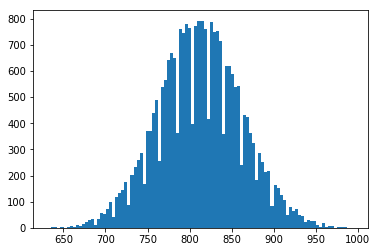

(812.40031999999997, 49.679836391614657)


In [7]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [8]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        k = q[i]
        q[i] = q[j]
        q[j] = k
    return q

In [10]:
T = 25000
radius = 8
alpha = 2.00

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif((q_cost - p_cost) < alpha * np.exp(t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

(5.624898910522461, 610.0)


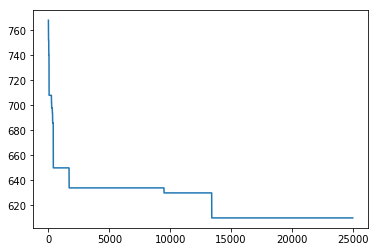

In [11]:
plt.figure()
plt.plot(costs)
plt.show()

# ZAD 1

## a

## b

In [12]:
def qap_SA(T, radius, alpha):
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if (q_cost < p_cost):
            p, p_cost = q, q_cost
        elif((q_cost - p_cost) < alpha * np.exp(t/T)):
            p, p_cost = q, q_cost
        costs[t]= p_cost
    return costs

def multiple_qap_SA(T, radius, alpha, repeats):
    costs = np.empty(0);
    for r in range(repeats):
        costs= np.concatenate((costs, qap_SA(T, radius, alpha)))
    return costs

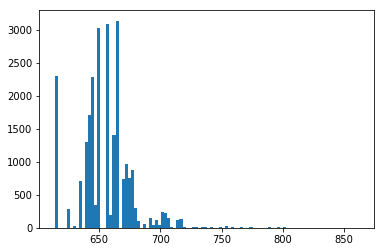

In [13]:
plt.figure()
plt.hist(multiple_qap_SA(2500, 8, 2.00, 10), bins=100)
plt.show()

## c

In [14]:
def qap_SA_rates(T, radius, alpha, bin_size):
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    success = np.zeros(T/bin_size)
    acc_failure = np.zeros(T/bin_size)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if (q_cost < p_cost):
            p, p_cost = q, q_cost
            success[t/bin_size]+=1
        elif((q_cost - p_cost) < alpha * np.exp(t/T)):
            p, p_cost = q, q_cost
            acc_failure[t/bin_size]+=1
    return success, acc_failure

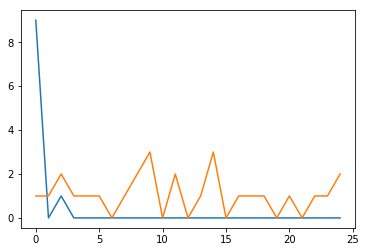

In [23]:
plt.figure()
bin_size = 100000
T = 2500000

t = np.arange(0, T/bin_size, 1)

succ, acc_fail = qap_SA_rates(T, 8, 2.00, bin_size)
plt.plot(t, succ, acc_fail)
plt.show()

## d

Odległość między permutacjami można zdefiniować jako minimalna liczbę swapów potrzebnych do uzyskania permutacji p1 z permutacji p2. Można z dużą dokładnością szacować minimalną liczbę swapów przez liczbę wykonanych swapów.